In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['Species'] = label_encoder.fit_transform(df['Species'])

In [ ]:
df.drop(['Id'], axis=1, inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
def outlier_func(df,*col):
 for i in col:
  Q1,Q3 = np.percentile(df[i],[25,75])
  IQR = Q3-Q1 # getting IQR
  LowerRange = Q1-(1.5 * IQR) # getting Lowrange
  UpperRange = Q3+(1.5 * IQR)
  index_del=df[(df[i]<LowerRange) | (df[i]>UpperRange)].index
  df.drop(index_del,inplace=True)
 return df

In [ ]:
x=df.drop(['Species'],axis=1)
y=df['Species']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
df.Species = df.Species.astype('float64')

In [ ]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,df.drop('Species',axis=1),df['Species'])
  error_rate.append(np.mean(score))


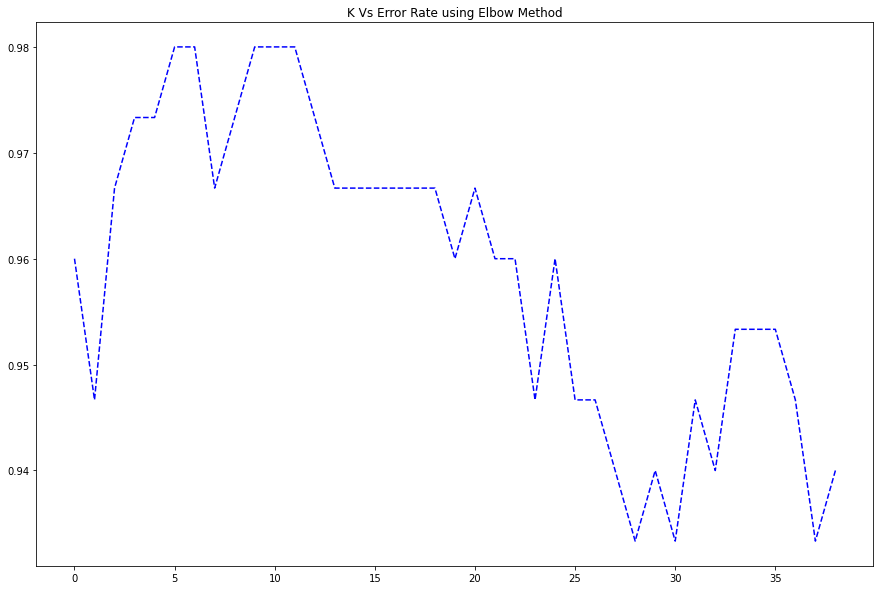

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(error_rate,linestyle='--',color='blue')
plt.title('K Vs Error Rate using Elbow Method')
plt.show()

In [ ]:
#hence best value for k is 5

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

In [ ]:
KNN.score(x_train, y_train)

0.975

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9  0  0]
 [ 0  8  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



**Conclusion:**

Successfully implemented kNN classifier using sklearn built in function and determine the optimum value of k by plotting the elbow curve.